# 泰坦尼克号乘员获救情况分析

## 项目背景

本项目从数据分析的角度，简单解析一下Titanic号上获救成员的信息。找出在所有乘员中，高的生存率的人具有什么样的特点。

本次数据来源于[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview)。



In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
# 获取数据
data = pd.read_csv('./titanic_data.csv')
# 总览
data.info()

# 年龄分组
def get_age_group(age,lim = 10):
    return '[{0},{1})'.format(lim*int(age//lim), lim*int(age//lim) + lim)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 数据概况

本次数据包含12个字段，共891条记录。Survived字段表示的是该乘客是否获救，其余都是乘客的个人信息，包括：

PassengerId => 乘客ID

Pclass => 乘客等级(1/2/3等舱位)

Name => 乘客姓名

Sex => 性别

Age => 年龄

SibSp => 堂兄弟/妹个数

Parch => 父母与小孩个数

Ticket => 船票信息

Fare => 票价

Cabin => 客舱

Embarked => 登船港口

本次对Pclass、Sex、Age三个有相关性的字段进行分析，但数据中Age存在缺失，所以在综合分析中，将使用Age值不为空的数据进行分析。

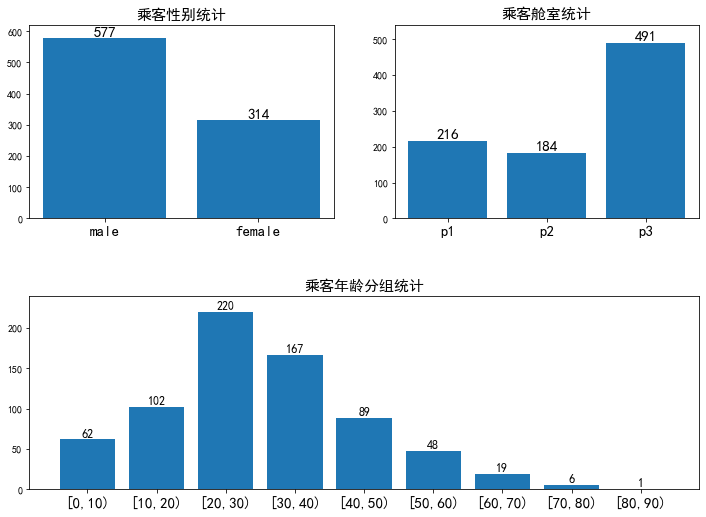

In [106]:
# 数据总览
fig = plt.figure(figsize=(12,6))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# gender
male_count = data.Sex[data.Sex == 'male'].count()
female_count = data.Sex[data.Sex == 'female'].count()

plt.subplot(221)
plt.bar(['male','female'],[male_count,female_count])
plt.xticks(fontsize=15)
plt.ylim(0,620)
plt.title('乘客性别统计',fontsize=15)
plt.text('male',male_count,'%d' % male_count,ha='center',va='bottom',fontsize=15)
plt.text('female',female_count,'%d' % female_count,ha='center',va='bottom',fontsize=15)

# class
p1_count = data.Pclass[data.Pclass == 1].count()
p2_count = data.Pclass[data.Pclass == 2].count()
p3_count = data.Pclass[data.Pclass == 3].count()

plt.subplot(222)
plt.bar(['p1','p2','p3'],[p1_count,p2_count,p3_count])
plt.xticks(fontsize=15)
plt.ylim(0,540)
plt.title('乘客舱室统计',fontsize=15)
plt.text('p1',p1_count,'%d' % p1_count,ha='center',va='bottom',fontsize=15)
plt.text('p2',p2_count,'%d' % p2_count,ha='center',va='bottom',fontsize=15)
plt.text('p3',p3_count,'%d' % p3_count,ha='center',va='bottom',fontsize=15)

# age
age_data = data[data['Age'].notnull()] # 有空缺数据
age_data.loc[:,'GroupAge'] = age_data.Age.apply(get_age_group)
age_count = age_data.groupby(['GroupAge']).Survived.count()

plt.subplot(212)
plt.bar(age_count.index,age_count.values)
plt.xticks(fontsize=15)
plt.ylim(0,240)
plt.title('乘客年龄分组统计',fontsize=15)
for k,v in zip(age_count.index,age_count.values):
    plt.text(k,v,'%d' % v,ha='center',va='bottom',fontsize=12)

plt.subplots_adjust(top=1.2,hspace=0.4)

## 数据总览

从上图可以看出，乘客一共其中
- 乘客中，男性有577人，女性有314人，男性乘客人数远多于女性。
- 一等舱乘客有216人，二等舱乘客有184人，三等舱乘客有491人，一等舱乘客和二等舱乘客数量相差不大。
- 乘客的年龄分布类似于正态分布。20-30岁的乘客最多，为220人；30-40岁的乘客其实，有167人；80-90岁年龄段人数最少，只有1人。

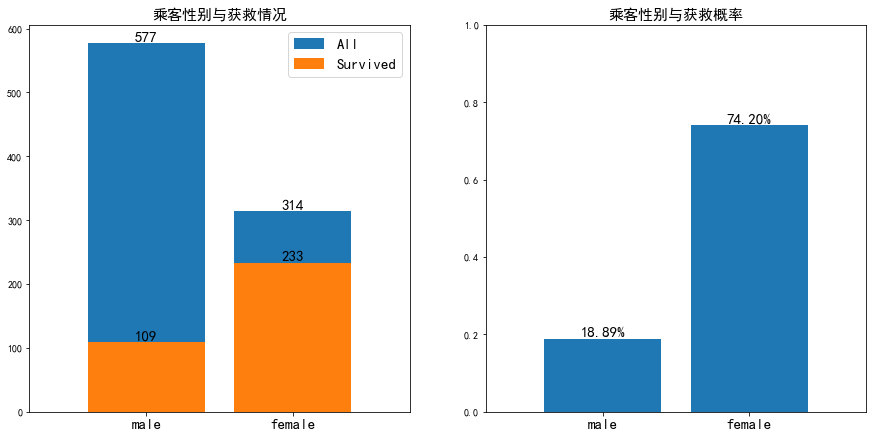

In [105]:
# 乘客性别与获救情况
male_survived_count = data.Sex[data.Sex == 'male'][data.Survived == 1].count()
female_survived_count = data.Sex[data.Sex == 'female'][data.Survived == 1].count()
male_survived_rate = male_survived_count / male_count
female_survived_rate = female_survived_count / female_count

fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plt.bar([0,1],[male_count,female_count],label='All')
plt.bar([0,1],[male_survived_count,female_survived_count],label='Survived')
plt.xticks([0,1],['male','female'],fontsize=15) 
plt.xlim((-0.8,1.8))
plt.title('乘客性别与获救情况',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.text(0,male_count,'%d' % male_count,ha='center',va='bottom',fontsize=15)
plt.text(0,male_survived_count,'%d' % male_survived_count,ha='center',va='bottom',fontsize=15)
plt.text(1,female_count,'%d' % female_count,ha='center',va='bottom',fontsize=15)
plt.text(1,female_survived_count,'%d' % female_survived_count,ha='center',va='bottom',fontsize=15)

plt.subplot(122)
plt.bar([0,1],[male_survived_rate,female_survived_rate])
plt.xticks([0,1],['male','female'],fontsize=15)
plt.xlim((-0.8,1.8))
plt.ylim((0,1))
plt.title('乘客性别与获救概率',fontsize=15)
plt.text(0,male_survived_rate,'%.2f%%' % (male_survived_rate * 100),ha='center',va='bottom',fontsize=15)
plt.text(1,female_survived_rate,'%.2f%%' % (female_survived_rate * 100),ha='center',va='bottom',fontsize=15)

plt.subplots_adjust(top=1.2,hspace=0.4)

# 乘客性别与获救情况

从上面的输出中我们看到，女性获救人数远远高于男性，获救比例也远高于男性。

在577名男性中，获救的只有109名，比例约为18.89%；在314名女性中，获救的有233名，比例约为74.20%。

在此次的事故中，多数的女性获得的了生存，即有更多的求生资源，于此同时男性只占有较少的求生资源。

考虑到女士优先的求生准则，在此关键时刻，女性确实得到了更多的保护。

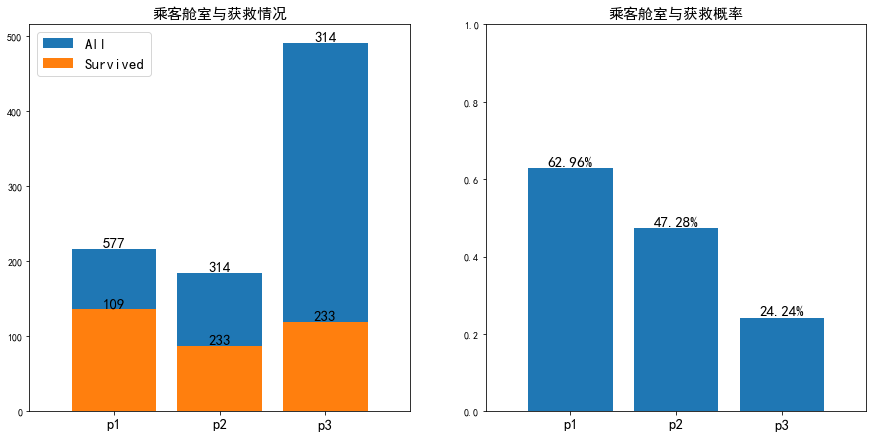

In [109]:
# 乘客舱室与获救情况
p1_survived_count = data.Pclass[data.Pclass == 1][data.Survived == 1].count()
p2_survived_count = data.Pclass[data.Pclass == 2][data.Survived == 1].count()
p3_survived_count = data.Pclass[data.Pclass == 3][data.Survived == 1].count()
p1_survived_rate = p1_survived_count / p1_count
p2_survived_rate = p2_survived_count / p2_count
p3_survived_rate = p3_survived_count / p3_count

fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plt.bar([0,1,2],[p1_count,p2_count,p3_count],label='All')
plt.bar([0,1,2],[p1_survived_count,p2_survived_count,p3_survived_count],label='Survived')
plt.xticks([0,1,2],['p1','p2','p3'],fontsize=15) 
plt.xlim((-0.8,2.8))
plt.title('乘客舱室与获救情况',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.text(0,p1_count,'%d' % male_count,ha='center',va='bottom',fontsize=15)
plt.text(0,p1_survived_count,'%d' % male_survived_count,ha='center',va='bottom',fontsize=15)
plt.text(1,p2_count,'%d' % female_count,ha='center',va='bottom',fontsize=15)
plt.text(1,p2_survived_count,'%d' % female_survived_count,ha='center',va='bottom',fontsize=15)
plt.text(2,p3_count,'%d' % female_count,ha='center',va='bottom',fontsize=15)
plt.text(2,p3_survived_count,'%d' % female_survived_count,ha='center',va='bottom',fontsize=15)

plt.subplot(122)
plt.bar([0,1,2],[p1_survived_rate,p2_survived_rate,p3_survived_rate])
plt.xticks([0,1,2],['p1','p2','p3'],fontsize=15)
plt.xlim((-0.8,2.8))
plt.ylim((0,1))
plt.title('乘客舱室与获救概率',fontsize=15)
plt.text(0,p1_survived_rate,'%.2f%%' % (p1_survived_rate * 100),ha='center',va='bottom',fontsize=15)
plt.text(1,p2_survived_rate,'%.2f%%' % (p2_survived_rate * 100),ha='center',va='bottom',fontsize=15)
plt.text(2,p3_survived_rate,'%.2f%%' % (p3_survived_rate * 100),ha='center',va='bottom',fontsize=15)

plt.subplots_adjust(top=1.2,hspace=0.4)

## 乘客舱室与获救情况

根据数据及图例，可以看出，三等舱人数最多，其次是一等舱，二等舱最少；生还人数上，一等舱生还人数最多，其次是三等舱，二等舱最少。

一等舱生还比例最高，为62.96%；二等舱次之，为47.28%；三等舱最低，只有24.24%，一等舱乘客的生还率远高于三等舱，是两倍还多。

考虑到不同舱位的贫富的差异，富有的乘客生还率远高于相对贫穷的人。

贫富差异造成导致的生存资源差异，在灾难中同样很客观的进行了体现。

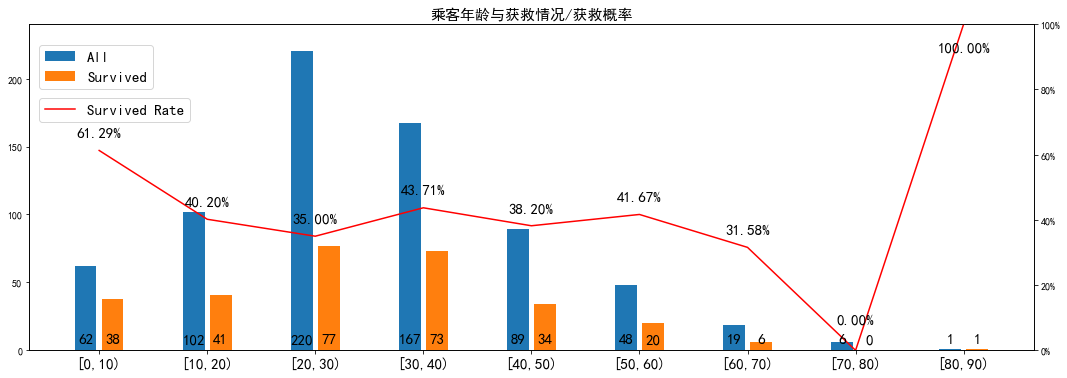

In [8]:
# 乘客年龄与获救情况
age_survived_count = age_data.groupby(['GroupAge'])['Survived'].sum()
age_survived_rate = age_survived_count / age_count
age_survived_rate_show = age_survived_rate * 240 # 定义左y坐标，最大240

fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(111)
x1,x2,x_gap = [],[],[]
for pstn in list(range(0,len(age_count.index) * 4,4)):
    x1.append(pstn)
    x2.append(pstn + 1)
    x_gap.append(pstn + 0.5)

ax1.bar(x1,age_count.values,label='All')
ax1.bar(x2,age_survived_count.values,label='Survived')
plt.xticks(x_gap,age_count.index,fontsize=15)
ax1.set_ylim(0,240)
plt.legend(loc=(0.01,0.8),fontsize=15)
ax2 = ax1.twinx()
ax2.plot(x_gap,age_survived_rate_show.values,color='red',label='Survived Rate')
ax2.set_ylim(0,240)
plt.yticks(np.arange(0,288,48),['0%','20%','40%','60%','80%','100%'])
plt.title('乘客年龄与获救情况/获救概率',fontsize=15)
plt.legend(loc=(0.01,0.7),fontsize=15)
for temp_x1,temp_y1,temp_x2,temp_y2 in zip(x1,age_count,x2,age_survived_count):
    plt.text(temp_x1,5,'%d' % temp_y1,ha='center',va='baseline',fontsize=15)
    plt.text(temp_x2,5,'%d' % temp_y2,ha='center',va='baseline',fontsize=15)
for temp_x,temp_y,temp_data in zip(x_gap,age_survived_rate_show,age_survived_rate):
    if (temp_data == 1):
        plt.text(temp_x,220,'%.2f%%' % (temp_data * 100),ha='center',fontsize=15)
    elif (temp_data == 0):
        plt.text(temp_x,20,'%.2f%%' % (temp_data * 100),ha='center',fontsize=15)
    else:
        plt.text(temp_x,temp_y + 10,'%.2f%%' % (temp_data * 100),ha='center',fontsize=15)

## 乘客年龄与获救情况

从图上可以看到，年龄段为70-80，和80-90的数据较少，并不具备显著的统计学意义。

生还率最高的年龄段为0-10岁，达到了61.29%左右；
生还率最低的年龄段为60-70岁，只有31.58%左右；
青壮年人群的生还率在35%-45%之间，其中生还率最低的是20-30岁人群，只有35%左右。

从数据中，可以看出，幼年获救的几率是最大的，而老年人的生存几率是最低的。这可以理解为，老人放弃了生存的希望，而全船的人更希望将生的机会留给最年轻的孩子。而青壮年人群（10-60岁），生存的几率大体相当，在年轻人更有存活的机会这种道德层面来说，没有存在青年比壮年的生存几率多。考虑到前面的舱室分析，壮年持有的财富数量比青年持有的多的概率较大，竟而，青年人群比壮年人群生存率低。

In [24]:
# 综合统计
sum_data = age_data.drop(columns=['PassengerId','SibSp','Name','Age','Parch','Ticket','Fare','Cabin','Embarked'])
sum_count = sum_data.groupby(['Sex','Pclass','GroupAge']).count()
survived_sum = sum_data.groupby(['Sex','Pclass','GroupAge']).sum()
survived_rate = survived_sum['Survived'] / sum_count['Survived']
survived_sum['SurvivedRate'] = survived_rate

print(survived_sum)

                        Survived  SurvivedRate
Sex    Pclass GroupAge                        
female 1      [0,10)           0      0.000000
              [10,20)         13      1.000000
              [20,30)         15      0.937500
              [30,40)         27      1.000000
              [40,50)         13      1.000000
              [50,60)         11      0.916667
              [60,70)          3      1.000000
       2      [0,10)           8      1.000000
              [10,20)          8      1.000000
              [20,30)         22      0.880000
              [30,40)         16      0.941176
              [40,50)          9      0.900000
              [50,60)          5      0.833333
       3      [0,10)          11      0.523810
              [10,20)         13      0.541667
              [20,30)         15      0.483871
              [30,40)          7      0.437500
              [40,50)          0      0.000000
              [60,70)          1      1.000000
male   1     

([<matplotlib.axis.XTick at 0x1729676c320>,
 <a list of 9 Text xticklabel objects>)

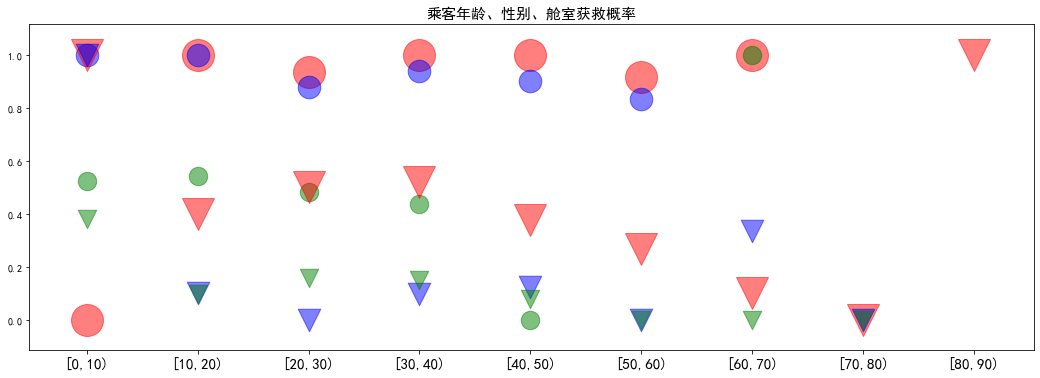

In [69]:
fig = plt.figure(figsize=(18,6))
x_dict = {'[0,10)':1,'[10,20)':2,'[20,30)':3,
          '[20,30)':3,'[30,40)':4,'[40,50)':5,
          '[50,60)':6,'[60,70)':7,'[70,80)':8,
          '[80,90)':9}     
for key,value in zip(survived_sum.SurvivedRate.index,survived_sum.SurvivedRate.values):
    pcolor,pmarker = None,None
    if(key[0] == 'male'):
        pmarker = 'v'
    else:
        pmarker = 'o'
    if(key[1] == 1):
        pcolor = 'red'
    elif(key[1] == 2):
        pcolor = 'blue'
    else:
        pcolor = 'green'
    plt.scatter(x_dict[key[2]],value,s=1024/(key[1]/1),color=pcolor,marker=pmarker,alpha = 0.5)
plt.title('乘客年龄、性别、舱室获救概率',fontsize=15)
plt.xticks(list(x_dict.values()),list(x_dict.keys()),fontsize=15)

上面的气泡图中，横坐标代表年龄段分布，纵坐标代表乘客生还率；红色的气泡代表一等舱乘员，蓝色代表二等舱乘员，绿色代表三等舱乘员；圆形代表女性乘员，三角形代表男性成员；一等舱的图标最大，二等舱其次，三等舱最小。 

## 综合分析

从统计数据来看：
- 一等舱的乘员中，年龄10-60岁之间的女性具有最高的生还率，在90%以上；
- 二等舱的乘员中，年龄0-60岁之间的女性具有非常高的生还率，在80%以上；
- 男性乘员中，只有儿童（10岁以下）具有比较高的生还率。乘坐二等舱的男性儿童生还率近乎100%。

从图中可以看到：
- 从10岁直到70岁这个年龄段，几乎所有舱位的女性乘客生还率都高于男性乘员。
- 乘坐一等舱和二等舱的女性乘客，只要年龄超过10岁，其生还率几乎都在80%以上。

最终可以得出，在年龄在10-70岁之间乘坐三等舱以上的女性生还率最高。生还率在80%以上。